In [17]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [18]:
#Given
u_max = 1
rho_max = 10

rho_l = 4
x_l = 2

L = 4
nx = 81
dx = L / (nx - 1)

nt = 30

sigma = 1

dt = (sigma * dx) / u_max

x = numpy.linspace(0, L, num=nx)
rho0 = numpy.zeros

def ic(rho_l, x, x_l):
    x = numpy.linspace(0, L, num=nx)
    rho0 = numpy.zeros(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.0, x <= x_l))
    rho0[mask] = rho_l * x[mask] / x_l
    return rho0

def flux(rho, u_max, rho_max):
    flux = u_max * rho * (1 - rho / rho_max)
    return flux

def velocity(rho, u_max, rho_max):
    u = u_max * (1 - rho / rho_max)
    return u

def ftbs(rho0, dt, dx, nt, rho_max, u_max):
    rho0 = ic(rho_l, x, x_l)
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        rho[1:] = rho[1:] - dt / dx * (flux(rho = rho[1:], u_max=u_max, rho_max=rho_max) - flux(rho = rho[:-1], u_max=u_max, rho_max=rho_max))
        rho_hist.append(rho.copy())
    return rho_hist
    
rho_hist = ftbs(rho0 = rho0, dt = dt, dx = dx, nt = nt, rho_max = rho_max, u_max = u_max)





In [19]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.title('Time Step: {}'.format(n))
    pyplot.xlabel('Road')
    pyplot.ylabel('Traffic Density')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(-0.5, 11.0)
    pyplot.show()
    

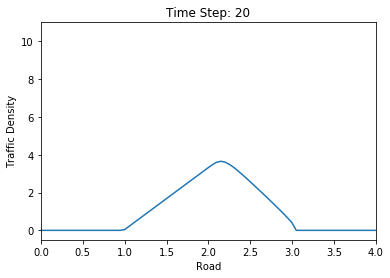

In [20]:
plot(20, x, rho_hist)

In [21]:
import ipywidgets

In [24]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description='Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), rho_hist=ipywidgets.fixed(rho_hist))
    return w

In [25]:
interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…